In [8]:
import random
import numpy as np

from EnvCatcher import EnvCatcher
from IPython import display
from matplotlib import pyplot as plt
import time

In [9]:
# set experimental parameters
max_num_episodes = 10
max_num_steps = 100
# can set a random seed for consistency in agent AND environment
random_seed = None
if random_seed is not None:
    np.random.seed(random_seed)
frame = 0
#translate the actions to human readable words
action_space = ["Left","Stay","Right"]
#size of the game field
grid_size = 10

In [10]:
def graphics(action,ep_reward,observation):
    global frame
    print("ep: {}, steps: {}, ep_reward_total: {}".format(i_episode, t+1, ep_reward))
    if("End" not in action_space[action]):
        plt.imshow(observation.reshape((grid_size,)*2),
               interpolation='none', cmap='gray')
        display.clear_output(wait=True)
        display.display(plt.gcf())
    frame = fps(frame)

In [11]:
def fps(last_frame_time,FPS = 1):
    current_milli_time = lambda: int(round(time.time() * 1000))
    sleep_time = 1./FPS - (current_milli_time() - last_frame_time)
    if sleep_time > 0:
        time.sleep(sleep_time)
    return current_milli_time()

In [12]:
env = EnvCatcher(grid_size=10, env_type='episodic', verbose=False, 
                 max_num_steps=100, random_seed=random_seed)

total_reward_by_episode = []

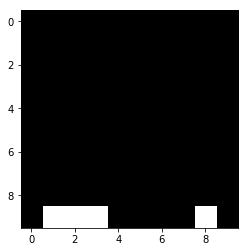

ep: 9, steps: 9, ep_reward_total: -1


In [13]:
for i_episode in range(max_num_episodes):
    # for each episode reset the environment and the episode reward
    observation = env.reset()
    ep_reward = 0
    # perform the episode for the max number of steps
    for t in range(max_num_steps):
        # random action policy
        action = np.random.randint(env.action_space)
        # take action in environment
        observation, reward, done, info = env.step(action)
        # accumulate reward
        ep_reward += reward
        graphics(action,ep_reward,observation)
        # environment will provide a done flag, learning should handle it
        if done:
            print("ep: {}, steps: {}, ep_reward_total: {}".format(i_episode, t+1, 
                  ep_reward))
            total_reward_by_episode.append(ep_reward)
            break

In [7]:
print('episode rewards', total_reward_by_episode)
print('sum of episode rewards', np.sum(total_reward_by_episode))
print('average episodic reward', np.sum(total_reward_by_episode)/float(len(total_reward_by_episode)))

episode rewards [-1, 1, -1, 1, -1, 1, 1, 1, 1, 1]
sum of episode rewards 4
average episodic reward 0.4
